In [25]:
import numpy as np
import ipldstore
import xarray as xr
from pprint import pprint
from multiformats import CID
import matplotlib.pyplot as plt

print(np.version.full_version)

1.22.2


In [27]:

ipld_mapper = ipldstore.get_ipfs_mapper()
cid_obj = CID.decode("bafyreigfq3tkn5gz25e2zszptevhs32sw5vpw7bkvgxh3l7hd6sp7jdwnm")
ripld_mapper = ipldstore.get_ipfs_mapper()
rcid_obj = CID.decode("bafyreidmc6z6muggwxtstcs2nwvssor73wbkf67fy3pwdellsfzc2vs3mq")
print(rcid_obj)
ipld_mapper.set_root(cid_obj)  # doctest: +SKIP
ripld_mapper.set_root(rcid_obj)  # doctest: +SKIP
#z = xr.open_zarr(ipld_mapper, group='received_beacons', consolidated=False)  # doctest: +SKIP
sent_beacons = xr.open_zarr(ipld_mapper, consolidated=False)  # doctest: +SKIP
received_beacons = xr.open_zarr(ripld_mapper, consolidated=False)  # doctest: +SKIP
#print('z', z)  # doctest: +SKIP
print('Sent', sent_beacons)
print('Start Date', sent_beacons.ReceivedTimestamp[0].values)
print('End Date', sent_beacons.ReceivedTimestamp[-1].values)
print('')
print('Received Beacons', received_beacons)
print('Start Date', received_beacons.ReceivedTimestamp[0].values)
print('End Date', received_beacons.ReceivedTimestamp[-1].values)
print('')


#df = z.to_dataframe()
#df.to_csv('loc.csv')

bafyreidmc6z6muggwxtstcs2nwvssor73wbkf67fy3pwdellsfzc2vs3mq
Sent <xarray.Dataset>
Dimensions:            (receivedtimestamp: 345103)
Coordinates:
    Latitude           (receivedtimestamp) float32 dask.array<chunksize=(86276,), meta=np.ndarray>
    Longitude          (receivedtimestamp) float32 dask.array<chunksize=(86276,), meta=np.ndarray>
    PubKey             (receivedtimestamp) object dask.array<chunksize=(43138,), meta=np.ndarray>
Dimensions without coordinates: receivedtimestamp
Data variables:
    Datarate           (receivedtimestamp) object dask.array<chunksize=(43138,), meta=np.ndarray>
    Frequency          (receivedtimestamp) int32 dask.array<chunksize=(86276,), meta=np.ndarray>
    GridLat            (receivedtimestamp) float32 dask.array<chunksize=(86276,), meta=np.ndarray>
    GridLon            (receivedtimestamp) float32 dask.array<chunksize=(86276,), meta=np.ndarray>
    HexLocation        (receivedtimestamp) int64 dask.array<chunksize=(43138,), meta=np.ndarray>
  

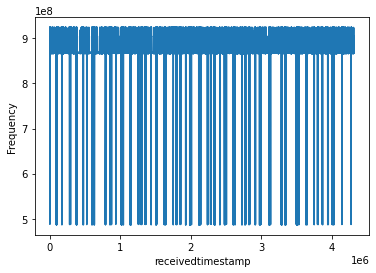

In [4]:
z.Frequency.plot()
plt.show()

In [36]:
import time
print(sent_beacons.ReceivedTimestamp[0].values)
print(sent_beacons.Frequency)

#pk = sent_beacons.PubKey.sel()

#t = sent_beacons.Frequency.sel(receivedtimestamp='2023-01-26T20:41:52.656000000')

2023-01-26T20:41:50.996000000
<xarray.DataArray 'Frequency' (receivedtimestamp: 345103)>
dask.array<open_dataset-e911adad882c30500d83af20a4345247Frequency, shape=(345103,), dtype=int32, chunksize=(86276,), chunktype=numpy.ndarray>
Coordinates:
    Latitude   (receivedtimestamp) float32 dask.array<chunksize=(86276,), meta=np.ndarray>
    Longitude  (receivedtimestamp) float32 dask.array<chunksize=(86276,), meta=np.ndarray>
    PubKey     (receivedtimestamp) object dask.array<chunksize=(43138,), meta=np.ndarray>
Dimensions without coordinates: receivedtimestamp
Attributes:
    units:    Hertz


In [32]:
time_window = z.isel(receivedtimestamp=slice(0,10))
print(time_window)

<xarray.Dataset>
Dimensions:            (receivedtimestamp: 10)
Dimensions without coordinates: receivedtimestamp
Data variables: (12/18)
    Datarate           (receivedtimestamp) object dask.array<chunksize=(10,), meta=np.ndarray>
    Frequency          (receivedtimestamp) int32 dask.array<chunksize=(10,), meta=np.ndarray>
    HexLocation        (receivedtimestamp) int64 dask.array<chunksize=(10,), meta=np.ndarray>
    HexScale           (receivedtimestamp) float32 dask.array<chunksize=(10,), meta=np.ndarray>
    InvalidReason      (receivedtimestamp) object dask.array<chunksize=(10,), meta=np.ndarray>
    Latitude           (receivedtimestamp) float32 dask.array<chunksize=(10,), meta=np.ndarray>
    ...                 ...
    RewardUnit         (receivedtimestamp) int32 dask.array<chunksize=(10,), meta=np.ndarray>
    SNR                (receivedtimestamp) int32 dask.array<chunksize=(10,), meta=np.ndarray>
    Selected           (receivedtimestamp) int32 dask.array<chunksize=(10,),

In [31]:
time_window.Signal.values

array([ -210, -1020,  -280,  -900,  -260,  -350, -1150,  -300, -1150,
        -120])